## Trial simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
import pandas as pd
from itertools import accumulate

## Test where our cut off value should be

In [2]:
asdf = np.zeros(100000)
for i in range(0,100000):
    outcomes = np.zeros(120)
    for a in range(0,120):
        outcomes[a] = 0 if random.uniform(0,1) > 0.1 else 1
    asdf[i]= 1 if outcomes.sum()>=18  else 0

    

In [3]:
asdf.sum()/100000*100


5.3469999999999995

## Analysis how often we would stop the trial under H0 with instantaneous events

In [66]:
total_number_pat = 120
number_of_months = 24
p = 0.10
number_of_simulations = 300000

interim_1 = 30
interim_2 = 60
analyses = [interim_2,total_number_pat]
analysis_array  = np.zeros((number_of_simulations,2))
for simulation_index in range(0,number_of_simulations):
    outcomes = []
    for index, analysis in enumerate(analyses):
        if index == 0:
            number_of_samples = analysis
        else:
            number_of_samples = analysis - analyses[index-1]
        for i in range(0,number_of_samples):
            outcomes.append(0) if random.uniform(0,1) > p else outcomes.append(1)
        if index != len(analyses)-1:
            upper_limit_under_p = binom.ppf(0.95, analysis, p)
        else:
            upper_limit_under_p = binom.ppf(0.95, analysis, p)
        analysis_array[simulation_index,index] = 1 if sum(outcomes) >= upper_limit_under_p else 0
    

In [71]:
analysis_array.sum(axis = 0)/number_of_simulations*100

array([7.39033333, 5.373     ])

In [63]:
print('percentage of stopping under H0 distribution',np.any(analysis_array,axis = 1).sum()/number_of_simulations*100,'%')

percentage of stopping under H0 distribution 9.974 %


## Alternative interim analyses scheme

In [11]:
total_number_pat = 120
number_of_months = 24
p = 0.10
number_of_simulations = 10000
number_of_analyses = 12
analyses = list(range(10,130,10))
analysis_array  = np.zeros((number_of_simulations,number_of_analyses))
for simulation_index in range(0,number_of_simulations):
    outcomes = []
    for index, analysis in enumerate(analyses):
        if index == 0:
            number_of_samples = analysis
        else:
            number_of_samples = analysis - analyses[index-1]
        for i in range(0,number_of_samples):
            outcomes.append(0) if random.uniform(0,1) > p else outcomes.append(1)
        if index != number_of_analyses-1:
            upper_limit_under_p = binom.ppf(0.95, analysis, 0.1)
        else:
            upper_limit_under_p = binom.ppf(0.95, analysis, p)
        analysis_array[simulation_index,index] = 1 if sum(outcomes) >= upper_limit_under_p else 0

In [12]:
analysis_array.sum(axis = 0)

array([ 700., 1333.,  742., 1002.,  590.,  736.,  880.,  551.,  623.,
        711.,  796.,  526.])

In [13]:
analysis_array.sum()

9190.0

In [14]:
print('percentage of stopping under H0 distribution',np.any(analysis_array,axis = 1).sum()/number_of_simulations*100,'%')

percentage of stopping under H0 distribution 25.82 %


We would stop too often!

## Double check lecture scheme

Double check lecture information

In [15]:
total_number_pat = 300
number_of_months = 24
p = 0.10
number_of_simulations = 10000
number_of_analyses = 10
analyses = list(range(30,301,30))

analysis_array  = np.zeros((number_of_simulations,number_of_analyses))
for simulation_index in range(0,number_of_simulations):
    outcomes = []
    for index, analysis in enumerate(analyses):
        if index == 0:
            number_of_samples = analysis
        else:
            number_of_samples = analysis - analyses[index-1]
        for i in range(0,number_of_samples):
            outcomes.append(0) if random.uniform(0,1) > p else outcomes.append(1)
        if index != number_of_analyses-1:
            upper_limit_under_p = binom.ppf(0.95, analysis, 0.1)
        else:
            upper_limit_under_p = binom.ppf(0.95, analysis, p)
        analysis_array[simulation_index,index] = 1 if sum(outcomes) >= upper_limit_under_p else 0

In [16]:
analysis_array.sum(axis = 0)

array([731., 715., 639., 535., 688., 552., 683., 563., 671., 539.])

In [17]:
print('percentage of stopping under H0 distribution',np.any(analysis_array,axis = 1).sum()/number_of_simulations*100,'%')

percentage of stopping under H0 distribution 20.59 %


## Realistic recruitement schemes

## Distribution to sample from to get the number of days until diagnose of recessive LNL
Here we just put a binomial distribution. Later we want to make it more elaborated by considering follow ups and maybe flatten the curve

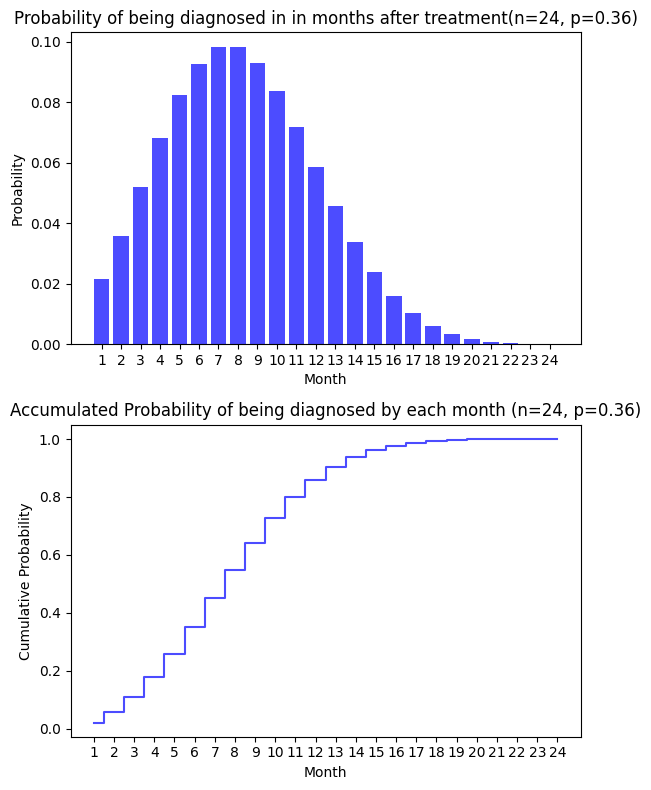

In [141]:
p_plot = 0.32
x = np.arange(1, number_of_months + 1)
pmf = binom.pmf(x, number_of_months, p_plot)
pmf = pmf**0.3/(pmf**0.3).sum()
cdf = list(accumulate(pmf))

# Plotting the distribution
plt.figure(figsize=(6, 8))

# Plotting the PMF
plt.subplot(2, 1, 1)
plt.bar(x, pmf, color='blue', alpha=0.7)
plt.title('Probability of being diagnosed in in months after treatment(n=24, p=0.36)')
plt.xlabel('Month')
plt.ylabel('Probability')
plt.xticks(x)

# Plotting the CDF
plt.subplot(2, 1, 2)
plt.step(x, cdf, where='mid', color='blue', alpha=0.7)
plt.title('Accumulated Probability of being diagnosed by each month (n=24, p=0.36)')
plt.xlabel('Month')
plt.ylabel('Cumulative Probability')
plt.xticks(x)

plt.tight_layout()
plt.show()

In [120]:
print('probability of diagnosis in months 1-4:', np.sum(pmf[:4])*100,'%')
print('probability of diagnosis in months 5-12:', np.sum(pmf[4:12])*100,'%')
print('probability of diagnosis in months 12-24:', np.sum(pmf[12:])*100,'%')


probability of diagnosis in months 1-4: 19.293443605746415 %
probability of diagnosis in months 5-12: 60.436062779416844 %
probability of diagnosis in months 12-24: 20.27049361483675 %


Now go fancier with modified distribution. We consider the following aspects:
- ultrasound after 6-8 weeks, 6 months, 12 months, 15 months, 18 months, 21 months, 23 months, 30 months+
- PET-CT after 3-4 months, 9 months, 24 months
- physical examination after 6-8 weeks, 3-4 months, 6 months, 9 months, 12 months, 15 months, 18 months, 21 months, 24 months

In [125]:
weights = np.ones_like(pmf)
weights_ultrasound = np.zeros_like(pmf)
weights_PET = np.zeros_like(pmf)

weights_ultrasound[[1,5,11,14,17,20]] = 0.3
weights_PET[[3,8,23]] = 1

weights += weights_ultrasound + weights_PET
weights

array([1. , 1.3, 1. , 2. , 1. , 1.3, 1. , 1. , 2. , 1. , 1. , 1.3, 1. ,
       1. , 1.3, 1. , 1. , 1.3, 1. , 1. , 1.3, 1. , 1. , 2. ])

Original PMF: [2.15789696e-02 3.58123132e-02 5.19296172e-02 6.81169560e-02
 8.23503690e-02 9.28193610e-02 9.82840928e-02 9.82840928e-02
 9.31619982e-02 8.39186507e-02 7.19567297e-02 5.87884986e-02
 4.57779201e-02 3.39646991e-02 2.39879267e-02 1.60998486e-02
 1.02425108e-02 6.15384298e-03 3.47342579e-03 1.82781546e-03
 8.86496195e-04 3.88936559e-04 1.49094539e-04 4.58343084e-05]
Weighted PMF: [8.58364616e-03 3.70379402e-02 4.13129513e-02 1.08381792e-01
 6.55143821e-02 9.59959756e-02 7.81905618e-02 7.81905618e-02
 1.48231291e-01 6.67620390e-02 5.72456535e-02 6.08004539e-02
 3.64189279e-02 2.70208416e-02 3.81675083e-02 1.28083413e-02
 8.14849738e-03 1.46871918e-02 2.76330692e-03 1.45413071e-03
 9.16835304e-04 3.09421059e-04 1.18613149e-04 1.09391364e-02]


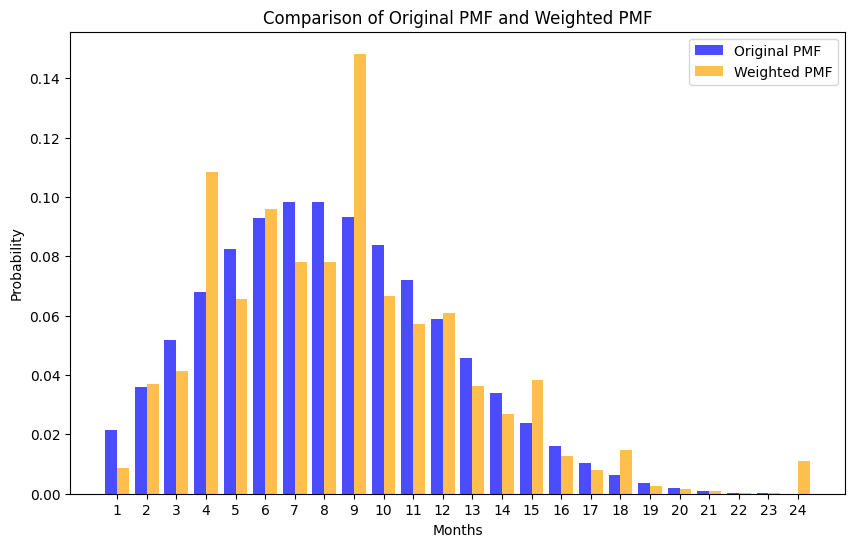

In [167]:
x = np.arange(1, number_of_months + 1)
pmf = binom.pmf(x, number_of_months, 0.32)
pmf = pmf**0.3/(pmf**0.3).sum()
cdf = list(accumulate(pmf))
# Define weights based on examination
weights = np.ones_like(pmf)
weights_ultrasound = np.zeros_like(pmf)
weights_PET = np.zeros_like(pmf)

weights_ultrasound[[1,5,11,14,17,20]] = 0.3
weights_PET[[3,8,23]] = 1


weights += weights_ultrasound + weights_PET
weights[-1] = 300
weights[14] = 2
weights[17] = 3
weights[0] = 0.5

# Apply weights to the PMF
weighted_pmf = pmf * weights

# Normalize the weighted PMF
weighted_pmf /= np.sum(weighted_pmf)

# Display the original PMF and weighted PMF
print("Original PMF:", pmf)
print("Weighted PMF:", weighted_pmf)



# Plot the original PMF and weighted PMF
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, pmf, width=0.4, label='Original PMF', color='blue', alpha=0.7)
plt.bar(x + 0.2, weighted_pmf, width=0.4, label='Weighted PMF', color='orange', alpha=0.7)
plt.xlabel('Months')
plt.ylabel('Probability')
plt.xticks(x)
plt.title('Comparison of Original PMF and Weighted PMF')
plt.legend()
plt.show()

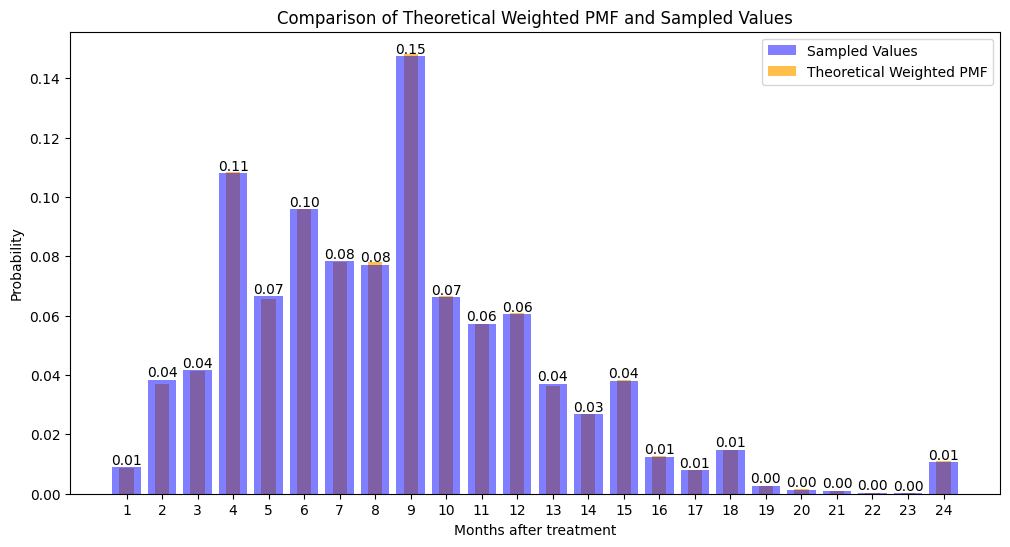

In [238]:
# Function to sample from the weighted PMF
def sample_custom_pmf(weighted_pmf, size=1):
    # Calculate the CDF of the weighted PMF for sampling
    cdf = list(accumulate(weighted_pmf))
    return np.searchsorted(cdf, np.random.rand(size))+1

samples = sample_custom_pmf(weighted_pmf, size=100000)
n = 24
# Plot the theoretical weighted PMF
plt.figure(figsize=(12, 6))
x_plot = np.arange(1, number_of_months + 1)
plt.bar(x_plot, weighted_pmf, width=0.4, label='Theoretical Weighted PMF', color='orange', alpha=0.7, align='center')
plt.xticks(x_plot)
# Plot the histogram of sampled values
sample_counts, bins, patches = plt.hist(samples, bins=np.arange(1,n + 2) - 0.5, density=True, alpha=0.5, color='blue', label='Sampled Values', rwidth=0.8)

# Adjust the bin labels to be at the center
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(sample_counts, bin_centers):
    plt.text(x, count, f'{count:.2f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Months after treatment')
plt.ylabel('Probability')
plt.title('Comparison of Theoretical Weighted PMF and Sampled Values')
plt.legend()
plt.show()


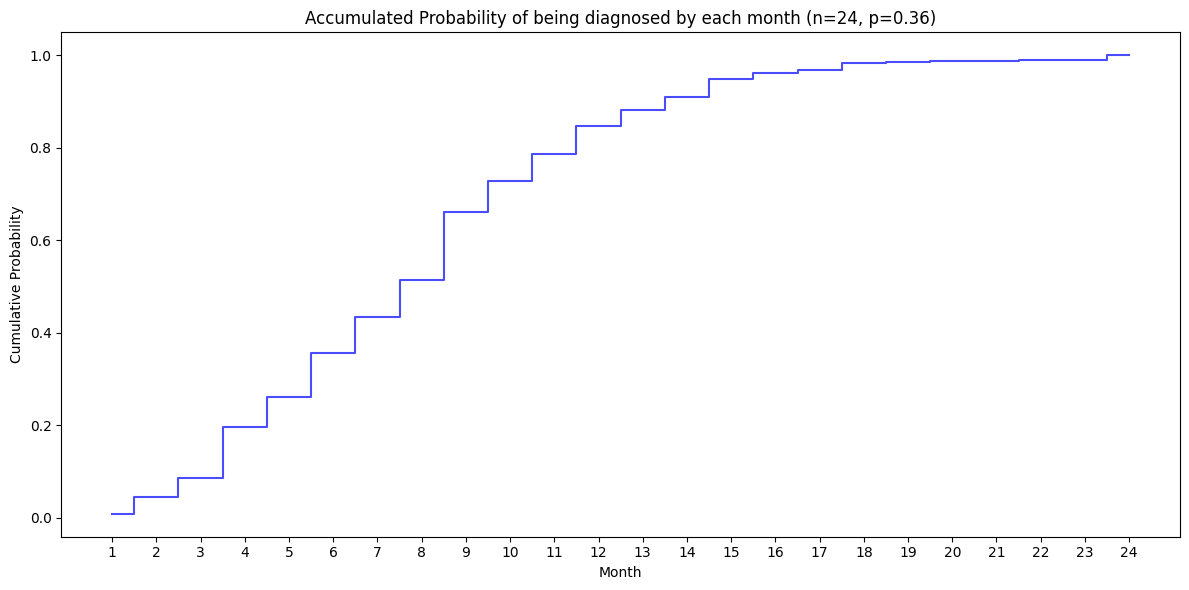

In [234]:
plt.figure(figsize=(12, 6))
plt.step(range(1,25), cdf, where='mid', color='blue', alpha=0.7)
plt.title('Accumulated Probability of being diagnosed by each month (n=24, p=0.36)')
plt.xlabel('Month')
plt.ylabel('Cumulative Probability')
plt.xticks(range(1,25))

plt.tight_layout()
plt.show()

## Recruitement definition

Text(0.5, 1.0, 'recruitement rates per months')

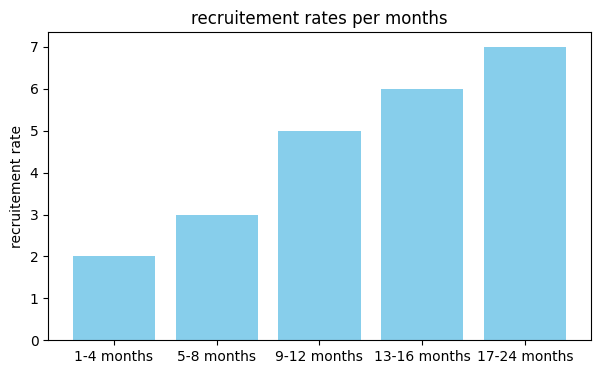

In [239]:
recruitement_rate_list = [2,3,5,6,7]
n_bars = len(recruitement_rate_list)

plt.figure(figsize=(7, 4))  
plt.bar(['1-4 months','5-8 months','9-12 months', '13-16 months', '17-24 months' ], recruitement_rate_list, color='skyblue')
plt.ylabel('recruitement rate')
plt.title('recruitement rates per months')

optimize recruiting with random number of recruited patients

In [306]:
def rate_sampler(month):
    rate_change = [5,9,13,17]
    rate_index = 4 - (np.array(rate_change) > month).sum()
    print(rate_index)
    if rate_index == 0:
        sample = np.round(np.random.normal(2,2/3,1))
        sample = np.clip(sample,0,4)
    elif rate_index == 1:
        sample = np.round(np.random.normal(3,2/3,1))
        sample = np.clip(sample,0,7)
    elif rate_index == 2:
        sample = np.round(np.random.normal(5,4/6,1))
        sample = np.clip(sample,0,8)
    elif rate_index == 3:
        sample = np.round(np.random.normal(6, 4/6, 1))
        sample = np.clip(sample, 0, 8)
    elif rate_index >= 4:
        sample = np.round(np.random.normal(7, 4/6, 1))
        sample = np.clip(sample, 0, 10)
    return sample

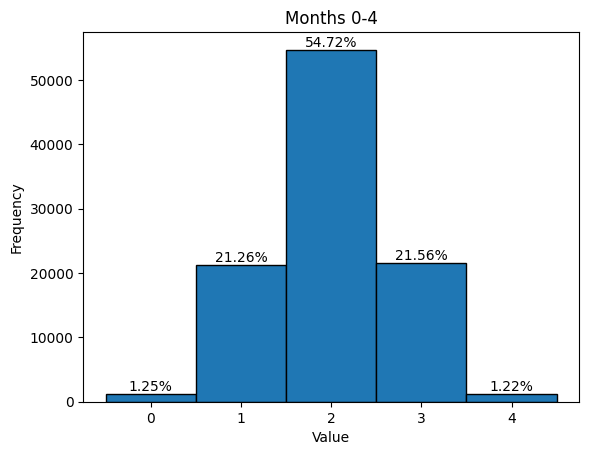

In [93]:
samples = np.round(np.random.normal(2, 2/3, 100000))
samples = np.clip(samples, 0, 4)

# Create the histogram
counts, bins, patches = plt.hist(samples, bins=np.arange(-0.5, 5.5, 1), edgecolor='black')
percentages = (counts / counts.sum()) * 100

# Adding percentages as text labels on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{percentages[i]:.2f}%', 
             ha='center', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Months 0-4')
plt.show()


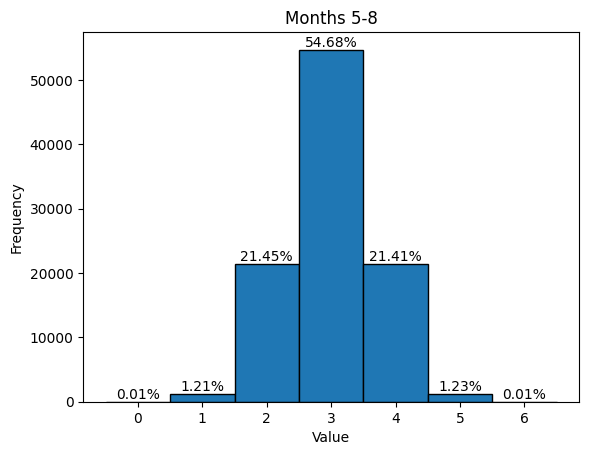

In [94]:
samples = np.round(np.random.normal(3, 2/3, 100000))
samples = np.clip(samples, 0, 7)

# Create the histogram
counts, bins, patches = plt.hist(samples, bins=np.arange(-0.5, 7.5, 1), edgecolor='black')
percentages = (counts / counts.sum()) * 100

# Adding percentages as text labels on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{percentages[i]:.2f}%', 
             ha='center', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Months 5-8')
plt.show()

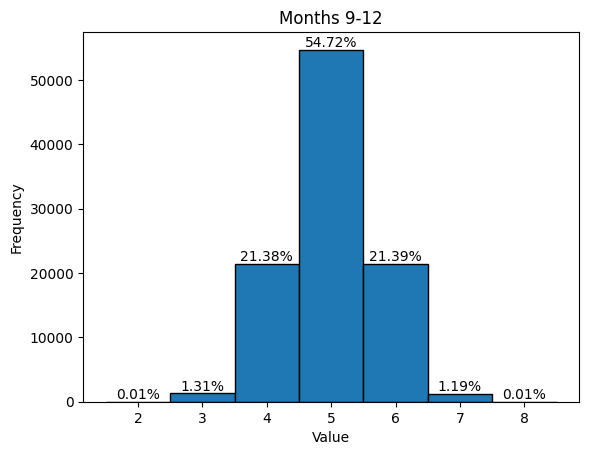

In [99]:
samples = np.round(np.random.normal(5, 4/6, 100000))
samples = np.clip(samples, 0, 8)

# Create the histogram
counts, bins, patches = plt.hist(samples, bins=np.arange(1.5, 9.5, 1), edgecolor='black')
percentages = (counts / counts.sum()) * 100

# Adding percentages as text labels on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{percentages[i]:.2f}%', 
             ha='center', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Months 9-12')
plt.show()

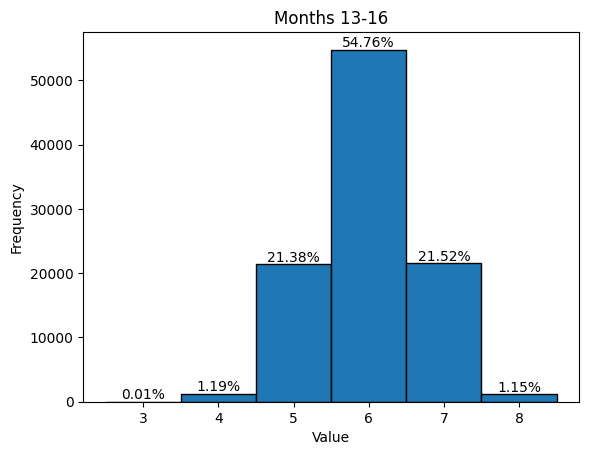

In [100]:
samples = np.round(np.random.normal(6, 4/6, 100000))
samples = np.clip(samples, 0, 8)

# Create the histogram
counts, bins, patches = plt.hist(samples, bins=np.arange(2.5, 9.5, 1), edgecolor='black')
percentages = (counts / counts.sum()) * 100

# Adding percentages as text labels on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{percentages[i]:.2f}%', 
             ha='center', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Months 13-16')
plt.show()

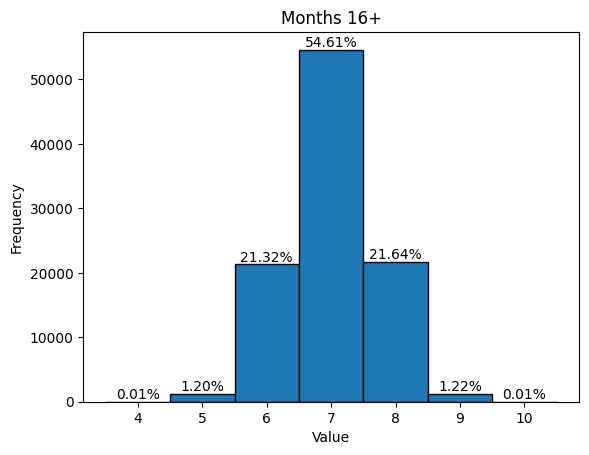

In [103]:
samples = np.round(np.random.normal(7, 4/6, 100000))
samples = np.clip(samples, 0, 10)

# Create the histogram
counts, bins, patches = plt.hist(samples, bins=np.arange(3.5, 11.5, 1), edgecolor='black')
percentages = (counts / counts.sum()) * 100

# Adding percentages as text labels on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{percentages[i]:.2f}%', 
             ha='center', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Months 16+')
plt.show()

## Recruitement evaluator

In [242]:
def interim_evaluator(recruitement_list,patient_true_status,patient_actual_status,p_interim = 0.10):
    upper_limit_under_p = binom.ppf(0.95, recruitement_list.sum(), p_interim)
    stopp_trial_true = 1 if sum(patient_true_status) >= upper_limit_under_p else 0
    stopp_trial_observed = 1 if sum(patient_actual_status) >= upper_limit_under_p else 0
    # print((recruitement_list).sum())
    # print('events true', sum(patient_true_status))
    # print('stopping condition', upper_limit_under_p)
    return np.array([stopp_trial_true, stopp_trial_observed])

In [243]:
def recruitement_evaluator(running_months = 36, recruitement_condition = None, total_number_pat = 120, p = 0.1, interim = None, p_interim = 0.10):
    if interim != None:
        interim_analyses = np.zeros((len(interim),2))
    else: 
        interim_analyses = 0
    interim_looper = 0
    number_of_follow_up_months = 24
    recruitement_list = np.zeros((total_number_pat,1))
    patients_time_count = np.zeros((total_number_pat,1))
    patient_true_status = np.zeros((total_number_pat,1))
    patient_observed_status = np.zeros((total_number_pat,1))
    recessive_patients_diagnose_time = np.zeros((total_number_pat,1))
    recruitement_month = np.zeros((total_number_pat,1))
    #Define recruitement rates and when they change
    rate_change = [4,8,12,16,10000]
    recruitement_rate_list = [2,3,5,6,7]
    patient_index = 0 #index of actual patient to be recruited
    rate_index = 0 #index of which rate is being used of the rate
    x = np.arange(0, number_of_follow_up_months + 1)
    #loop for recruiting a specified amount of patients
    if recruitement_condition == None:
        for month in range(1,running_months + 1):
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,total_number_pat):
                #update the observed status of the patients
                if patient_true_status[recruited_patient_index] == 1 and recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                    patient_observed_status[recruited_patient_index] = 1
            #Change the recruitement rate according to the actual month until we hit our quota
            if patient_index < total_number_pat - 1:
                if month > rate_change[rate_index]:
                    rate_index += 1
                
                number_of_new_patients = recruitement_rate_list[rate_index]
                for k in range(0,number_of_new_patients):
                    patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                    recruitement_list[patient_index] = 1
                    recruitement_month[patient_index] = month
                    if patient_true_status[patient_index] == 1:
                        recessive_patients_diagnose_time[patient_index] = int(np.random.binomial(number_of_follow_up_months, 0.4, 1))
                    patient_index += 1
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                interim_analyses[interim_looper] = interim_evaluator(recruitement_list,patient_true_status,patient_observed_status,p_interim)
                if interim_looper < len(interim)-1:
                    interim_looper += 1
   
    #loop for recruiting for a certain amount of months 
    else:
        month = 1
        while patient_index < recruitement_condition:
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,patient_index):
                #update the observed status of the patients
                if patient_true_status[recruited_patient_index] == 1:
                    if recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                        patient_observed_status[recruited_patient_index] = 1
            # recruite new patients
            if patient_index < total_number_pat - 1:
                if month > rate_change[rate_index]:
                    rate_index += 1
                number_of_new_patients = recruitement_rate_list[rate_index]
                for k in range(0,number_of_new_patients):
                    patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                    recruitement_list[patient_index] = 1
                    recruitement_month[patient_index] = month
                    if patient_true_status[patient_index] == 1:
                        recessive_patients_diagnose_time[patient_index] = int(np.random.binomial(number_of_follow_up_months, 0.4, 1))
                    patient_index += 1  
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                interim_analyses[interim_looper] = interim_evaluator(recruitement_list,patient_true_status,patient_observed_status,p_interim)
                interim_looper += 1     
            month += 1     

    concatenated_data = np.concatenate((recruitement_list,recruitement_month, patients_time_count,patient_true_status, patient_observed_status, recessive_patients_diagnose_time), axis=1)
    df = pd.DataFrame(concatenated_data, columns=['Recruitement status','Month of recruitement', 'Months since recruitement', 'True recessive status', 'Observed status', 'diagnose time after treatment'])
    return df, month, interim_analyses


In [1109]:
df, month, interim_analyses = recruitement_evaluator(running_months = 30, recruitement_condition = 60, total_number_pat = 120, p = 0.1,interim=[30,60,120])

Note the actual month has not passed, but just started

In [1102]:
print('actual month', month)
df.loc[0:3]

actual month 25


,Recruitement status,Month of recruitement,Months since recruitement,True recessive status,Observed status,diagnose time after treatment
0,1.0,1.0,23.0,0.0,0.0,0.0
1,1.0,1.0,23.0,0.0,0.0,0.0
2,1.0,2.0,22.0,0.0,0.0,0.0
3,1.0,2.0,22.0,0.0,0.0,0.0


## Visualize recruitement process

In [1110]:
def com_sum_creator(df,column):
    numbers_per_month = []
    for month_of_rec in range(1,month+1):
        numbers_per_month.append(df[column].loc[(df['Month of recruitement'] == month_of_rec)].sum())

    cumulative_patients = []
    current_sum = 0

    # Iterate over the list and compute the cumulative sum
    for value in numbers_per_month:
        current_sum += value
        cumulative_patients.append(current_sum)
    return cumulative_patients

In [1111]:
recruited_patients_per_month = []
for month_of_rec in range(1,month+1):
    recruited_patients_per_month.append((df['Month of recruitement'] == month_of_rec).sum())

cumulative_patients = []
current_sum = 0

# Iterate over the list and compute the cumulative sum
for value in recruited_patients_per_month:
    current_sum += value
    cumulative_patients.append(current_sum)

In [1112]:
cumulative_positive = com_sum_creator(df,'True recessive status')

In [1113]:
observed = np.zeros(17)
cumulative_observed = []
diagnose_time = df.loc[df['True recessive status'] == 1]['Month of recruitement'] + df.loc[df['True recessive status'] == 1]['diagnose time after treatment']
for i in range(1,18):
    observed[i-1] = (diagnose_time == i).sum()

current_sum = 0
for value in observed:
    current_sum += value
    cumulative_observed.append(current_sum)


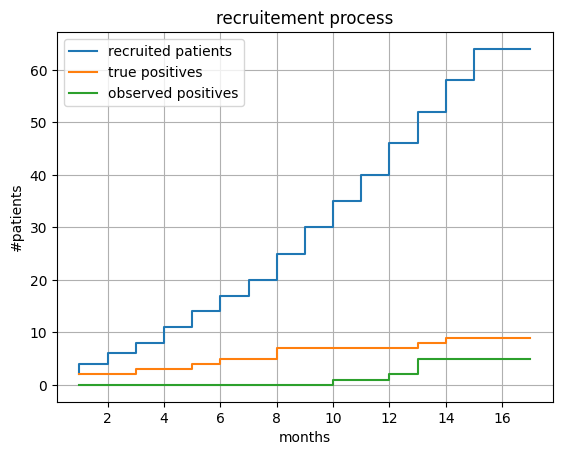

In [1114]:
plt.step(list(range(1,18)), cumulative_patients, label='recruited patients')
plt.step(list(range(1,18)), cumulative_positive, label='true positives')
plt.step(list(range(1,18)), cumulative_observed, label='observed positives')
plt.grid(visible = True)
plt.xlabel('months')
plt.ylabel('#patients')
plt.title('recruitement process')
plt.legend()


## Sample realistic recruitement

In [1119]:
df1, month1, interim_analyses1 = recruitement_evaluator(running_months = 48, p = 0.1,interim=[30,60,120])
interim_analyses1

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [511]:
# df1[0:60]

In [1120]:
number_of_simulations = 10000
stopping_array = np.zeros((number_of_simulations,2))
stopping_at_interim = np.zeros((number_of_simulations,2))
for i in range(0,number_of_simulations):
    df_looper, month_looper, interim_analyses_looper = interim_analyses = recruitement_evaluator(running_months= 48, recruitement_condition=120, p = 0.10,interim=[30,60,120])
    stopping_array[i] = np.any(interim_analyses_looper,axis = 0)
    stopping_at_interim[i] = np.any(interim_analyses_looper[:2],axis = 0)

In [1122]:
stopping_array.sum(axis = 0)/10000*100

array([12.73,  0.  ])

In [1123]:
stopping_at_interim.sum(axis = 0)/10000*100

array([10.21,  0.  ])

## Improve process by adding the 2 month break before analysis


In [1184]:
def recruitement_evaluator2(running_months = 36, recruitement_condition = None, total_number_pat = 120, p = 0.1, interim = None, p_interim = 0.10, break_after_recruiting = 2):
    if interim != None:
        interim_analyses = np.zeros((len(interim),2))
    else: 
        interim_analyses = 0
    interim_looper = 0
    number_of_follow_up_months = 24
    recruitement_list = np.zeros((total_number_pat,1))
    patients_time_count = np.zeros((total_number_pat,1))
    patient_true_status = np.zeros((total_number_pat,1))
    patient_actual_status = np.zeros((total_number_pat,1))
    recessive_patients_diagnose_time = np.zeros((total_number_pat,1))
    recruitement_month = np.zeros((total_number_pat,1))
    #Define recruitement rates and when they change
    rate_change = [4,8,12,16,24,100000000]
    recruitement_rate_list = [2,3,5,6,7,0]
    patient_index = 0 #index of actual patient to be recruited
    rate_index = 0
    x = np.arange(0, number_of_follow_up_months + 1)
    p_binom = 0.37
    cdf = binom.cdf(x, number_of_follow_up_months, p_binom)
    #runs for a certain amount of months
    if recruitement_condition == None:
        for month in range(1,running_months + 1):
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,total_number_pat):
                if patient_true_status[recruited_patient_index] == 1 and recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                    patient_actual_status[recruited_patient_index] = 1
            # recruite new patients
            if month > rate_change[rate_index]:
                rate_index += 1
            number_of_new_patients = recruitement_rate_list[rate_index]
            for k in range(0,number_of_new_patients):
                patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                recruitement_list[patient_index] = 1
                recruitement_month[patient_index] = month
                if patient_true_status[patient_index] == 1:
                    recessive_patients_diagnose_time[patient_index] = int(np.random.binomial(number_of_follow_up_months, 0.4, 1))
                patient_index += 1
            # we go into interim analysis if we have recruited enough patients
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                    if (interim_looper != len(interim)-1): #not last analysis
                    #now we check whether 2 months have passed
                        if patients_time_count[interim[interim_looper]-1] == 2:
                            interim_analyses[interim_looper] = interim_evaluator(recruitement_list[:interim[interim_looper]],patient_true_status[:interim[interim_looper]],patient_actual_status[:interim[interim_looper]],p_interim)
                            interim_looper += 1 
                    #if it is the last analysis, we do it on the last month
                    elif month == running_months:    
                        interim_analyses[interim_looper] = interim_evaluator(recruitement_list,patient_true_status,patient_actual_status,p_interim)
                        interim_looper += 1 

    #runs until the recruitement condition is met
    else:
        month = 1
        while patient_index < recruitement_condition:
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,patient_index):
                if patient_true_status[recruited_patient_index] == 1:
                    if recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                        patient_actual_status[recruited_patient_index] = 1
            # recruite new patients
            if month > rate_change[rate_index]:
                rate_index += 1
            number_of_new_patients = recruitement_rate_list[rate_index]
            for k in range(0,number_of_new_patients):
                patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                recruitement_list[patient_index] = 1
                recruitement_month[patient_index] = month
                if patient_true_status[patient_index] == 1:
                    recessive_patients_diagnose_time[patient_index] = int(np.random.binomial(number_of_follow_up_months, 0.4, 1))
                patient_index += 1  
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                if patients_time_count[interim[interim_looper]-1] == 2:
                    interim_analyses[interim_looper] = interim_evaluator(recruitement_list[:interim[interim_looper]],patient_true_status[:interim[interim_looper]],patient_actual_status[:interim[interim_looper]],p_interim)
                    interim_looper += 1     
            month += 1     
    concatenated_data = np.concatenate((recruitement_list,recruitement_month, patients_time_count,patient_true_status, patient_actual_status, recessive_patients_diagnose_time), axis=1)
    df = pd.DataFrame(concatenated_data, columns=['Recruitement status','Month of recruitement', 'Months since recruitement', 'True recessive status', 'Observed status', 'diagnose time after treatment'])
    return df, month, interim_analyses


In [1212]:
df_looper, month_looper, interim_analyses_looper = interim_analyses = recruitement_evaluator2(running_months=48, total_number_pat = 120, p = 0.1,interim=[30,60,120])
interim_analyses_looper

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [919]:
df_looper[0:30]

,Recruitement status,Month of recruitement,Months since recruitement,True recessive status,Observed status,diagnose time after treatment
0,1.0,1.0,23.0,0.0,0.0,0.0
1,1.0,1.0,23.0,0.0,0.0,0.0
2,1.0,2.0,22.0,0.0,0.0,0.0
3,1.0,2.0,22.0,0.0,0.0,0.0
4,1.0,3.0,21.0,0.0,0.0,0.0
5,1.0,3.0,21.0,0.0,0.0,0.0
6,1.0,4.0,20.0,0.0,0.0,0.0
7,1.0,4.0,20.0,0.0,0.0,0.0
8,1.0,5.0,19.0,0.0,0.0,0.0
9,1.0,5.0,19.0,0.0,0.0,0.0


In [864]:
interim_analyses_looper[-1]

array([0., 0.])

In [978]:
number_of_simulations = 10000
stopping_array2 = np.zeros((number_of_simulations,2))
stopping_at_interim2 = np.zeros((number_of_simulations,2))
stopping_at_end2 = np.zeros((number_of_simulations,2))

for i in range(0,number_of_simulations):
    df_looper, month_looper, interim_analyses_looper = interim_analyses = recruitement_evaluator2(running_months= 48,recruitement_condition= 120, total_number_pat = 120, p = 0.1,interim=[30,60,120])
    stopping_array2[i] = np.any(interim_analyses_looper,axis = 0)
    stopping_at_interim2[i] = np.any(interim_analyses_looper[:2],axis = 0)
    stopping_at_end2[i] = np.any(interim_analyses_looper[-1],axis = 0)

In [979]:
stopping_array2.sum(axis = 0)

array([1070.,    2.])

In [980]:
stopping_at_interim2.sum(axis = 0)

array([1070.,    2.])

In [981]:
stopping_at_end2.sum()

0.0

## some distribution analysis

In [147]:
durations = np.zeros(100000)
for rander in range(0,100000):
    diagnose_time = int(np.random.binomial(24, 0.4, 1))
    if diagnose_time != 4 and diagnose_time != 9 and diagnose_time != 24:
        diagnose_time 
    durations[rander] = int(np.random.binomial(24, 0.4, 1))
        
    

(array([6.5000e+01, 1.2460e+03, 8.2220e+03, 2.3100e+04, 3.2241e+04,
        2.3657e+04, 9.3200e+03, 1.9090e+03, 2.3200e+02, 8.0000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

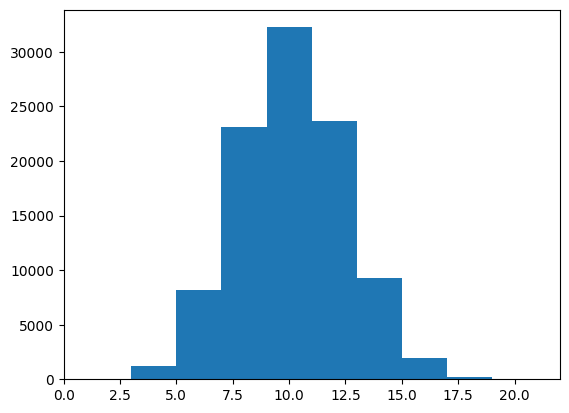

In [149]:
plt.hist(durations)

## Full elaborated simulation

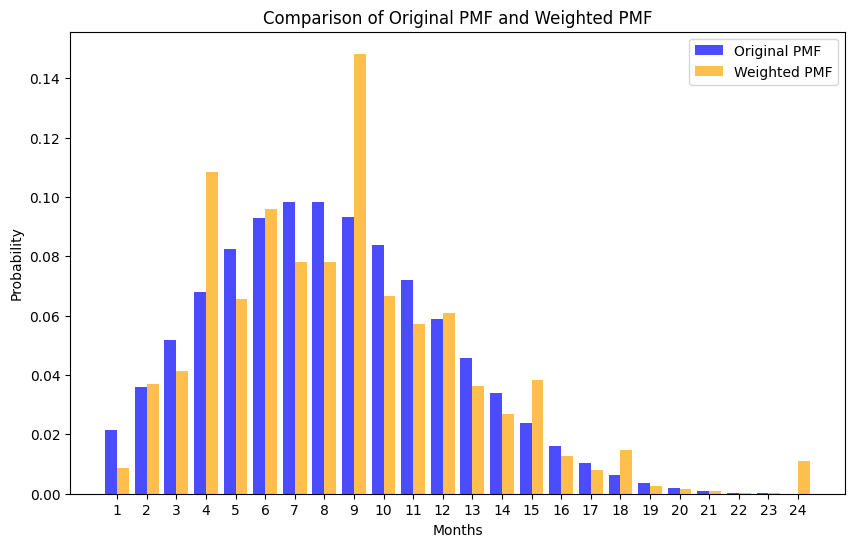

In [245]:
x = np.arange(1, number_of_months + 1)
pmf = binom.pmf(x, number_of_months, 0.32)
pmf = pmf**0.3/(pmf**0.3).sum()

# Define weights based on examination
weights = np.ones_like(pmf)
weights_ultrasound = np.zeros_like(pmf)
weights_PET = np.zeros_like(pmf)

weights_ultrasound[[1,5,11,14,17,20]] = 0.3
weights_PET[[3,8,23]] = 1

#some extra customization
weights += weights_ultrasound + weights_PET
weights[-1] = 300
weights[14] = 2
weights[17] = 3
weights[0] = 0.5

# Apply weights to the PMF
weighted_pmf = pmf * weights

# Normalize the weighted PMF
weighted_pmf /= np.sum(weighted_pmf)

# Plot the original PMF and weighted PMF
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, pmf, width=0.4, label='Original PMF', color='blue', alpha=0.7)
plt.bar(x + 0.2, weighted_pmf, width=0.4, label='Weighted PMF', color='orange', alpha=0.7)
plt.xlabel('Months')
plt.ylabel('Probability')
plt.xticks(x)
plt.title('Comparison of Original PMF and customized PMF')
plt.legend()
plt.show()

In [358]:
def rate_sampler(month):
    rate_change = [5,9,13,17]
    rate_index = 4 - (np.array(rate_change) > month).sum()
    if rate_index == 0:
        sample = np.round(np.random.normal(2,2/3,1))
        sample = np.clip(sample,0,4)
    elif rate_index == 1:
        sample = np.round(np.random.normal(3,2/3,1))
        sample = np.clip(sample,0,7)
    elif rate_index == 2:
        sample = np.round(np.random.normal(5,4/6,1))
        sample = np.clip(sample,0,8)
    elif rate_index == 3:
        sample = np.round(np.random.normal(6, 4/6, 1))
        sample = np.clip(sample, 0, 8)
    elif rate_index >= 4:
        sample = np.round(np.random.normal(7, 4/6, 1))
        sample = np.clip(sample, 0, 10)
    return sample

def sample_custom_pmf(size=1):
    x = np.arange(1, 24 + 1)
    pmf = binom.pmf(x, 24, 0.32)
    pmf = pmf**0.3/(pmf**0.3).sum()

    # Define weights based on examination
    weights = np.ones_like(pmf)
    weights_ultrasound = np.zeros_like(pmf)
    weights_PET = np.zeros_like(pmf)

    weights_ultrasound[[1,5,11,14,17,20]] = 0.3
    weights_PET[[3,8,23]] = 1

    #some extra customization
    weights += weights_ultrasound + weights_PET
    weights[-1] = 300
    weights[14] = 2
    weights[17] = 3
    weights[0] = 0.5

    # Apply weights to the PMF
    weighted_pmf = pmf * weights

    # Normalize the weighted PMF
    weighted_pmf /= np.sum(weighted_pmf)
    cdf = list(accumulate(weighted_pmf))
    return np.searchsorted(cdf, np.random.rand(size))+1

def recruitement_evaluator_extended(running_months = 30, recruitement_condition = None, total_number_pat = 120, p = 0.1, interim = None, p_interim = 0.10):
    if interim != None:
        interim_analyses = np.zeros((len(interim),2))
    else: 
        interim_analyses = 0
    interim_looper = 0
    number_of_follow_up_months = 24
    recruitement_list = np.zeros((total_number_pat,1))
    patients_time_count = np.zeros((total_number_pat,1))
    patient_true_status = np.zeros((total_number_pat,1))
    patient_observed_status = np.zeros((total_number_pat,1))
    recessive_patients_diagnose_time = np.zeros((total_number_pat,1))
    recruitement_month = np.zeros((total_number_pat,1))
    patient_index = 0 #index of actual patient to be recruited
    rate_index = 0 #index of which rate is being used of the rate
    x = np.arange(0, number_of_follow_up_months + 1)
    #loop for recruiting a specified amount of patients
    if recruitement_condition == None:
        for month in range(1,running_months + 1):
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,total_number_pat):
                #update the observed status of the patients
                if patient_true_status[recruited_patient_index] == 1 and recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                    patient_observed_status[recruited_patient_index] = 1
            #sample the number of recruited patients
            if patient_index < total_number_pat - 1:
                number_of_new_patients = int(rate_sampler(month))
                if number_of_new_patients > (total_number_pat - 1)-patient_index:
                    number_of_new_patients = (total_number_pat)-patient_index                
                for k in range(0,number_of_new_patients):
                    patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                    recruitement_list[patient_index] = 1
                    recruitement_month[patient_index] = month
                    if patient_true_status[patient_index] == 1:
                        recessive_patients_diagnose_time[patient_index] = int(sample_custom_pmf(size = 1))
                    patient_index += 1
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                interim_analyses[interim_looper] = interim_evaluator(recruitement_list[:interim[interim_looper]],patient_true_status[:interim[interim_looper]],patient_observed_status[:interim[interim_looper]],p_interim)
                if interim_looper < len(interim)-1:
                    interim_looper += 1
   
    #loop for recruiting for a certain amount of months 
    else:
        month = 1
        while patient_index < recruitement_condition:
            # update the already recruited patients
            patients_time_count[:patient_index] += 1
            for recruited_patient_index in range(0,patient_index):
                #update the observed status of the patients
                if patient_true_status[recruited_patient_index] == 1:
                    if recessive_patients_diagnose_time[recruited_patient_index] == patients_time_count[recruited_patient_index]:
                        patient_observed_status[recruited_patient_index] = 1
            # recruite new patients
            if patient_index < total_number_pat - 1:
                number_of_new_patients = int(rate_sampler(month))
                if number_of_new_patients > (recruitement_condition - 1)-patient_index:
                    number_of_new_patients = (recruitement_condition)-patient_index    
                for k in range(0,number_of_new_patients):
                    patient_true_status[patient_index] = 0 if random.uniform(0,1) > p else 1
                    recruitement_list[patient_index] = 1
                    recruitement_month[patient_index] = month
                    if patient_true_status[patient_index] == 1:
                        recessive_patients_diagnose_time[patient_index] = int(sample_custom_pmf(size = 1))
                    patient_index += 1  
            if (interim != None) and (recruitement_list.sum() >= interim[interim_looper]):
                interim_analyses[interim_looper] = interim_evaluator(recruitement_list[:interim[interim_looper]],patient_true_status[:interim[interim_looper]],patient_observed_status[:interim[interim_looper]],p_interim)
                interim_looper += 1     
            month += 1     

    concatenated_data = np.concatenate((recruitement_list,recruitement_month, patients_time_count,patient_true_status, patient_observed_status, recessive_patients_diagnose_time), axis=1)
    df = pd.DataFrame(concatenated_data, columns=['Recruitement status','Month of recruitement', 'Months since recruitement', 'True recessive status', 'Observed status', 'diagnose time after treatment'])
    return df, month, interim_analyses


In [359]:
df_looper, month_looper, interim_analyses_looper = interim_analyses = recruitement_evaluator_extended(running_months=48,recruitement_condition= 30, total_number_pat = 120, p = 0.1,interim=[30,60,120])


,Recruitement status,Month of recruitement,Months since recruitement,True recessive status,Observed status,diagnose time after treatment
0,1.0,1.0,9.0,0.0,0.0,0.0
1,1.0,1.0,9.0,0.0,0.0,0.0
2,1.0,2.0,8.0,1.0,0.0,11.0
3,1.0,2.0,8.0,0.0,0.0,0.0
4,1.0,3.0,7.0,0.0,0.0,0.0
5,1.0,3.0,7.0,0.0,0.0,0.0
6,1.0,3.0,7.0,0.0,0.0,0.0
7,1.0,4.0,6.0,0.0,0.0,0.0
8,1.0,4.0,6.0,0.0,0.0,0.0
9,1.0,5.0,5.0,0.0,0.0,0.0


In [316]:
rate_sampler(100)

4


array([7.])